In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
import os
import sys
sys.path.append(os.path.abspath('../'))
from tqdm import tqdm
from pathlib import Path
from collections import Counter
import multiprocessing as mp

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa import stattools
from scipy.stats import entropy, skew, kurtosis


from skin_lesion_cad.features.colour import ColorFeaturesExtractor

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# import PCA
from sklearn.decomposition import PCA

# from imblearn.over_sampling import SMOTE 

from skin_lesion_cad.visualization.utils import plot_roc_curve, roc_auc_score_multiclass

Results -> use no mask raw images (no meanshift)

# Check of circular mask is better than full image mask


Analyzing features for raw and 100
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       598
           1       0.84      0.90      0.87       814
           2       0.00      0.00      0.00       113

    accuracy                           0.80      1525
   macro avg       0.53      0.57      0.55      1525
weighted avg       0.74      0.80      0.77      1525

Confusion Matrix
 [[482 116   0]
 [ 78 736   0]
 [ 84  29   0]]

Accuracy raw-100 0.7986885245901639

F1-score avg raw-100 0.7679052608389617


/home/vzalevskyi/anaconda3/envs/cad_skin/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vzalevskyi/anaconda3/envs/cad_skin/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vzalevskyi/anaconda3/envs/cad_skin/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

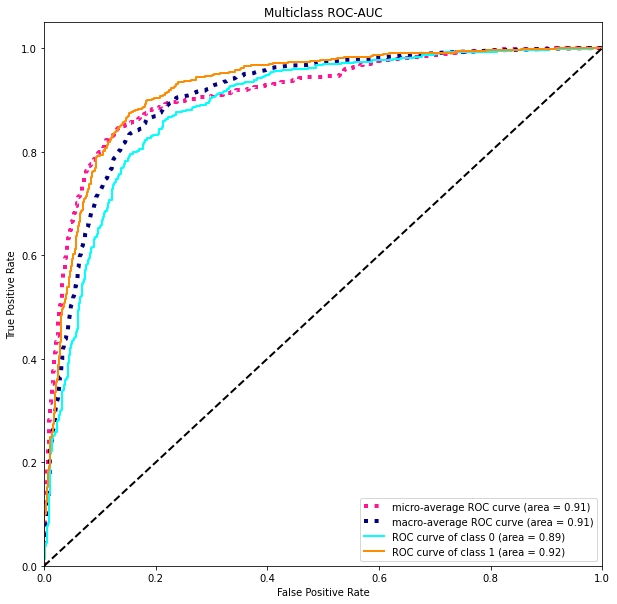


Analyzing features for raw and full_image
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       598
           1       0.85      0.88      0.86       814
           2       0.67      0.02      0.03       113

    accuracy                           0.80      1525
   macro avg       0.75      0.58      0.56      1525
weighted avg       0.79      0.80      0.77      1525

Confusion Matrix
 [[507  91   0]
 [100 713   1]
 [ 75  36   2]]

Accuracy raw-full_image 0.801311475409836

F1-score avg raw-full_image 0.7733879974237214


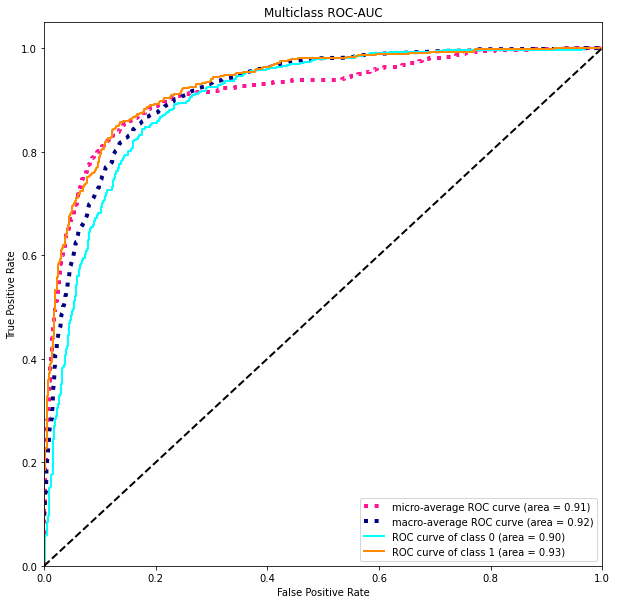


Analyzing features for meanshift and 100
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       598
           1       0.84      0.91      0.87       814
           2       0.00      0.00      0.00       113

    accuracy                           0.80      1525
   macro avg       0.53      0.57      0.55      1525
weighted avg       0.74      0.80      0.77      1525

Confusion Matrix
 [[483 115   0]
 [ 74 740   0]
 [ 82  31   0]]

Accuracy meanshift-100 0.801967213114754

F1-score avg meanshift-100 0.7709179875721974


/home/vzalevskyi/anaconda3/envs/cad_skin/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vzalevskyi/anaconda3/envs/cad_skin/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vzalevskyi/anaconda3/envs/cad_skin/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

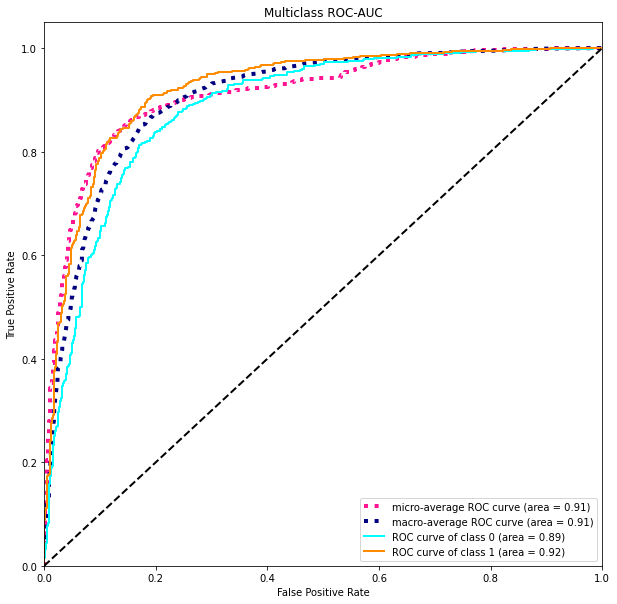


Analyzing features for meanshift and full_image
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       598
           1       0.84      0.88      0.86       814
           2       0.00      0.00      0.00       113

    accuracy                           0.80      1525
   macro avg       0.53      0.57      0.55      1525
weighted avg       0.74      0.80      0.77      1525

Confusion Matrix
 [[505  93   0]
 [101 713   0]
 [ 74  39   0]]

Accuracy meanshift-full_image 0.7986885245901639

F1-score avg meanshift-full_image 0.7687047363148711


/home/vzalevskyi/anaconda3/envs/cad_skin/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vzalevskyi/anaconda3/envs/cad_skin/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vzalevskyi/anaconda3/envs/cad_skin/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

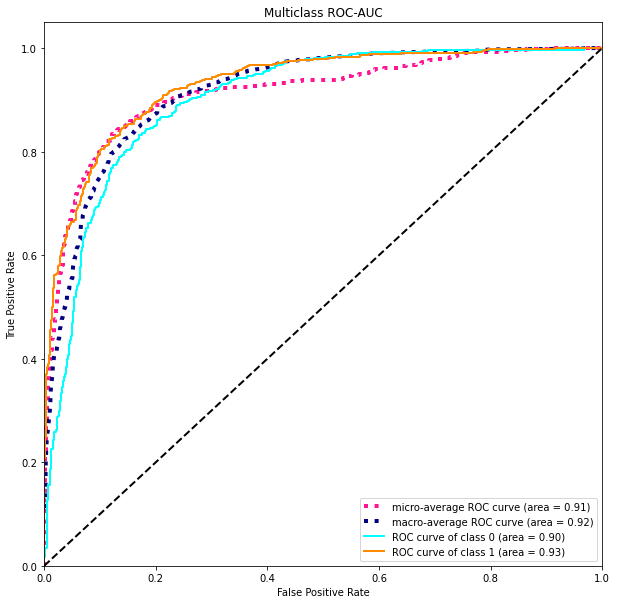

In [6]:
proc_data = Path().resolve().parent / 'data/processed'

chl = 'chall2'
mode = 'train'

for feat_type in ['raw', 'meanshift']:
    for mask_type in [100, 'full_image']:
        test_path = proc_data / f'{chl}/{mode}'
        print(f'\nAnalyzing features for {feat_type} and {mask_type}')
        
        bcc_data = pd.read_feather(test_path / f'bcc_color_features_{feat_type}_{mask_type}.feather').set_index('name')
        bcc_data['class'] = 0
        
        mel_data = pd.read_feather(test_path/ f'mel_color_features_{feat_type}_{mask_type}.feather').set_index('name')
        mel_data['class'] = 1
        
        scc_data = pd.read_feather(test_path/ f'scc_color_features_{feat_type}_{mask_type}.feather').set_index('name')
        scc_data['class'] = 2
        
        data = pd.concat([scc_data, bcc_data, mel_data])

        all_X = data.drop(columns=['class']).values
        all_y = data['class'].values
        

        all_X[np.isnan(all_X)] = 0
        all_X[np.isinf(all_X)] = 0
        
        split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
        train_idxs, test_idxs = next(split.split(all_X, all_y))
        X_train, X_test, y_train, y_test  = all_X[train_idxs], all_X[test_idxs], all_y[train_idxs], all_y[test_idxs]
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        svc = SVC(kernel='rbf', probability=True)
        svc.fit(X_train, y_train)

        y_pred = svc.predict(X_test)

        print(classification_report(y_test, y_pred))
        print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))
        print(f'\nAccuracy {feat_type}-{mask_type}', accuracy_score(y_test, y_pred))
        print(f'\nF1-score avg {feat_type}-{mask_type}', f1_score(y_test, y_pred, average='weighted'))
        
        enc = OneHotEncoder()
        y_test_oh = enc.fit_transform(y_test.reshape(-1,1)).toarray()
        roc_auc_score_multiclass(svc, X_test, y_test_oh)

# Feature Selection

### Feature Importances

In [76]:
proc_data = Path().resolve().parent / 'data/processed'

chl = 'chall2'
mode = 'train'

feat_type = 'raw'
mask_type = 'full_image'
test_path = proc_data / f'{chl}/{mode}'
print(f'\nAnalyzing features for {feat_type} and {mask_type}')

bcc_data = pd.read_feather(test_path / f'bcc_color_features_{feat_type}_{mask_type}.feather').set_index('name')
bcc_data['class'] = 0

mel_data = pd.read_feather(test_path/ f'mel_color_features_{feat_type}_{mask_type}.feather').set_index('name')
mel_data['class'] = 1

scc_data = pd.read_feather(test_path/ f'scc_color_features_{feat_type}_{mask_type}.feather').set_index('name')
scc_data['class'] = 2

data = pd.concat([scc_data, bcc_data, mel_data])



# DROPPING FEATURES
no_lab_features = [x for x in data.columns if 'lab' in x]
data = data.drop(columns=no_lab_features)



all_X = data.drop(columns=['class']).values
all_y = data['class'].values


all_X[np.isnan(all_X)] = 0
all_X[np.isinf(all_X)] = 0

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idxs, test_idxs = next(split.split(all_X, all_y))
X_train, X_test, y_train, y_test  = all_X[train_idxs], all_X[test_idxs], all_y[train_idxs], all_y[test_idxs]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Analyzing features for raw and full_image


In [78]:
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)

cols = data.columns[:-1]
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))
print(f'\nAccuracy {feat_type}-{mask_type}', accuracy_score(y_test, y_pred))
print(f'\nF1-score avg {feat_type}-{mask_type}', f1_score(y_test, y_pred, average='weighted'))

enc = OneHotEncoder()
y_test_oh = enc.fit_transform(y_test.reshape(-1,1)).toarray()


output = cross_validate(clf, X_train, y_train, cv=10, scoring = 'f1_micro', return_estimator =True)
feature_importances = []
for idx,estimator in enumerate(output['estimator']):
    feature_importances.append(pd.DataFrame(estimator.feature_importances_,
                                       index = cols,
                                        columns=['importance']).sort_values('importance', ascending=False))


              precision    recall  f1-score   support

           0       0.77      0.85      0.81       598
           1       0.86      0.90      0.88       814
           2       0.83      0.09      0.16       113

    accuracy                           0.82      1525
   macro avg       0.82      0.61      0.62      1525
weighted avg       0.82      0.82      0.80      1525

Confusion Matrix
 [[508  89   1]
 [ 81 732   1]
 [ 74  29  10]]

Accuracy raw-full_image 0.819672131147541

F1-score avg raw-full_image 0.7974150128053458


In [80]:
fi_res = pd.concat(feature_importances, axis=1).mean(axis=1).sort_values(ascending=False)
fi_res

hsv_s_std        0.050170
YCrCb_C_std      0.044211
bgr_r_entrp      0.038012
hsv_s_unq        0.031597
YCrCb_Y_entrp    0.028959
                   ...   
bgr_r_unq        0.008827
hsv_s_min        0.003463
YCrCb_r_entrp    0.002730
hsv_h_min        0.002364
YCrCb_C_entrp    0.000235
Length: 72, dtype: float64

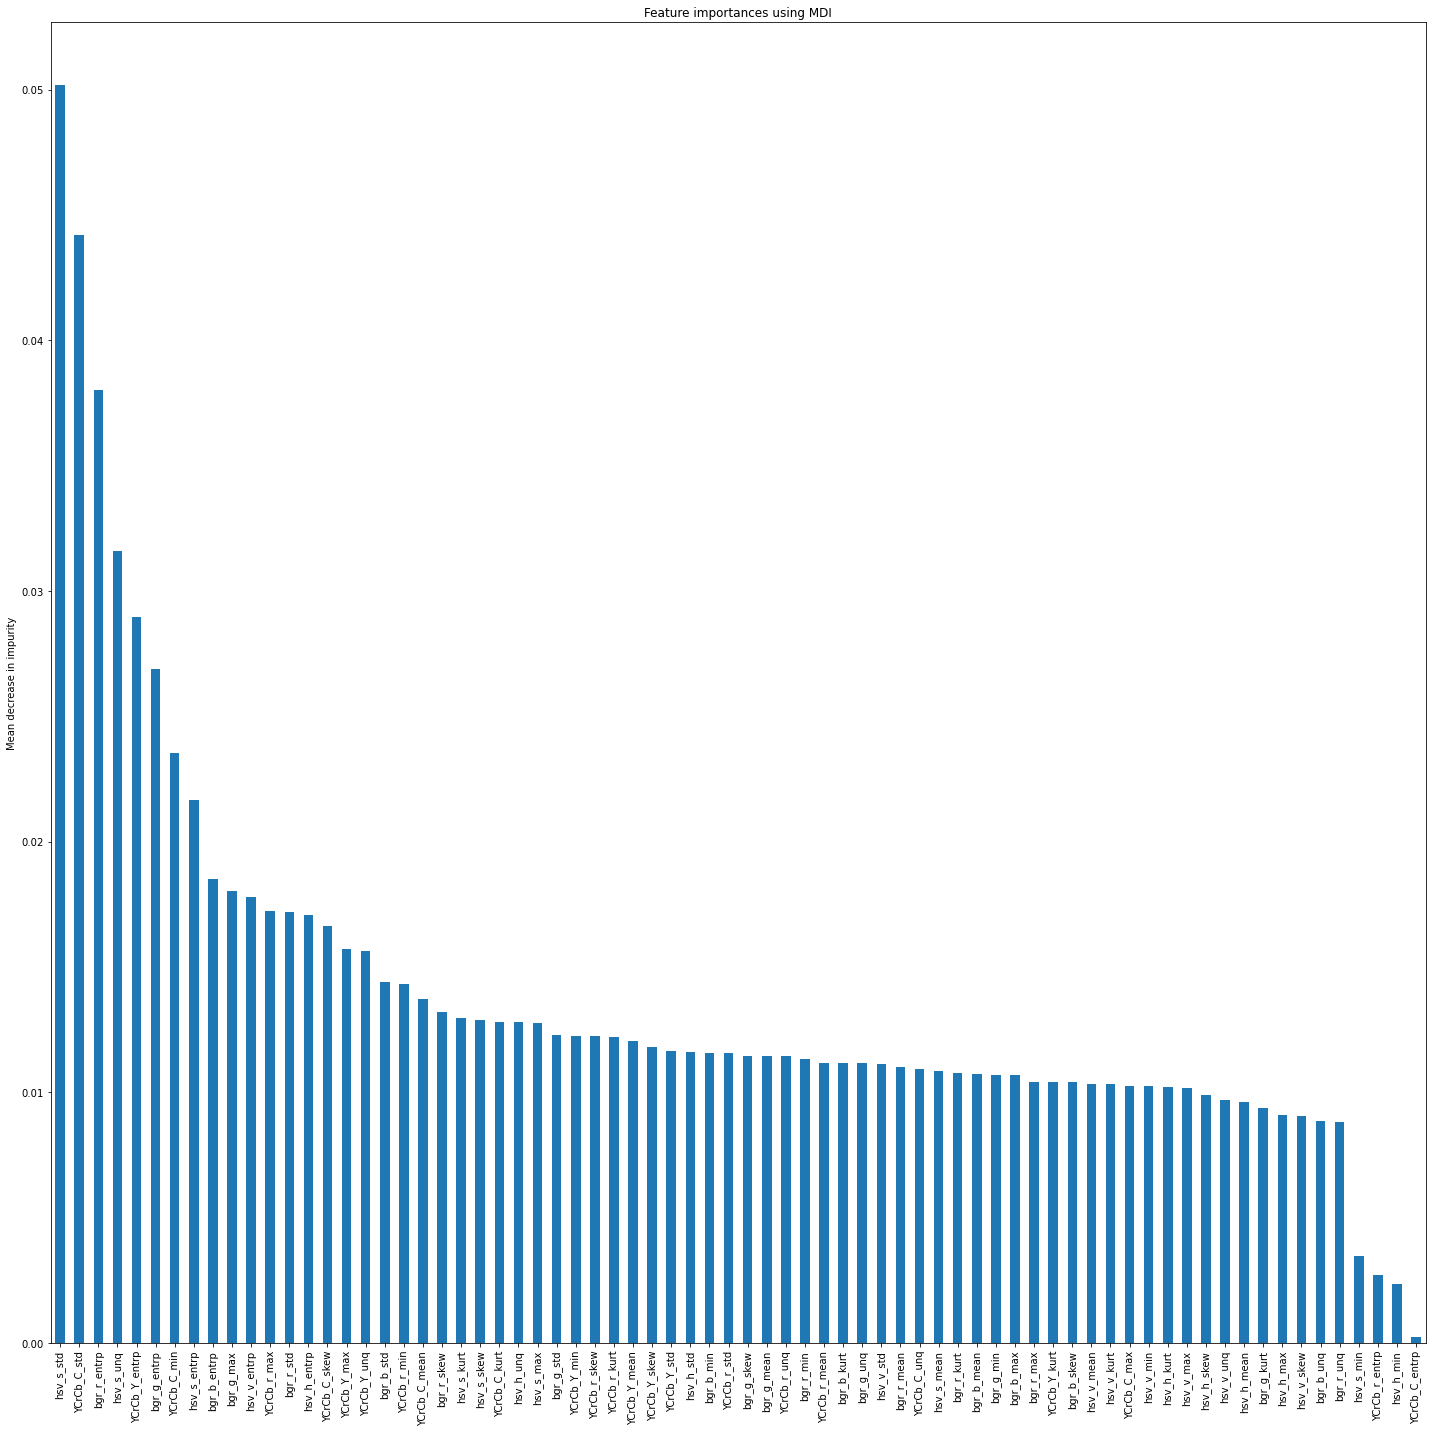

In [81]:
fig, ax = plt.subplots(figsize=(20, 20))
fi_res.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Dimensionality Reduction

In [57]:
proc_data = Path().resolve().parent / 'data/processed'

chl = 'chall2'
mode = 'train'

feat_type = 'raw'
mask_type = 'full_image'
test_path = proc_data / f'{chl}/{mode}'
print(f'\nAnalyzing features for {feat_type} and {mask_type}')

bcc_data = pd.read_feather(test_path / f'bcc_color_features_{feat_type}_{mask_type}.feather').set_index('name')
bcc_data['class'] = 0

mel_data = pd.read_feather(test_path/ f'mel_color_features_{feat_type}_{mask_type}.feather').set_index('name')
mel_data['class'] = 1

scc_data = pd.read_feather(test_path/ f'scc_color_features_{feat_type}_{mask_type}.feather').set_index('name')
scc_data['class'] = 2

data = pd.concat([scc_data, bcc_data, mel_data])



# DROPPING FEATURES
no_lab_features = [x for x in data.columns if 'lab' in x]
data = data.drop(columns=no_lab_features)



all_X = data.drop(columns=['class']).values
all_y = data['class'].values


all_X[np.isnan(all_X)] = 0
all_X[np.isinf(all_X)] = 0

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idxs, test_idxs = next(split.split(all_X, all_y))
X_train, X_test, y_train, y_test  = all_X[train_idxs], all_X[test_idxs], all_y[train_idxs], all_y[test_idxs]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Analyzing features for raw and full_image


In [58]:
pca = PCA(n_components=0.99)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# X_train_pca = X_train
# X_test_pca = X_test

print(X_test.shape)
print(X_test_pca.shape)

(1525, 72)
(1525, 34)


              precision    recall  f1-score   support

           0       0.74      0.85      0.79       598
           1       0.85      0.88      0.87       814
           2       0.75      0.03      0.05       113

    accuracy                           0.80      1525
   macro avg       0.78      0.58      0.57      1525
weighted avg       0.80      0.80      0.78      1525

Confusion Matrix
 [[509  89   0]
 [100 713   1]
 [ 78  32   3]]

Accuracy raw-full_image 0.8032786885245902

F1-score avg raw-full_image 0.7763201722462021


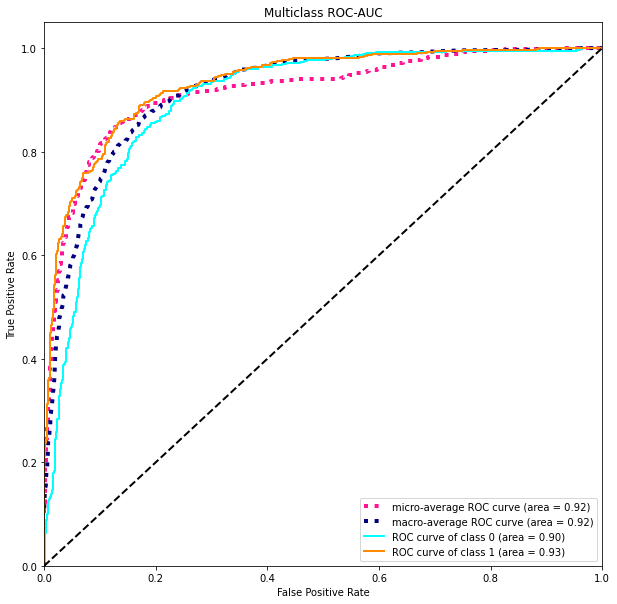

In [59]:
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train_pca, y_train)

y_pred = svc.predict(X_test_pca)

print(classification_report(y_test, y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))
print(f'\nAccuracy {feat_type}-{mask_type}', accuracy_score(y_test, y_pred))
print(f'\nF1-score avg {feat_type}-{mask_type}', f1_score(y_test, y_pred, average='weighted'))

enc = OneHotEncoder()
y_test_oh = enc.fit_transform(y_test.reshape(-1,1)).toarray()
roc_auc_score_multiclass(svc, X_test_pca, y_test_oh)

# Solving the minority problem

### SMOTE

In [5]:
proc_data = Path().resolve().parent / 'data/processed'

chl = 'chall2'
mode = 'train'

feat_type = 'raw'
mask_type = 'full_image'
test_path = proc_data / f'{chl}/{mode}'
print(f'\nAnalyzing features for {feat_type} and {mask_type}')

bcc_data = pd.read_feather(test_path / f'bcc_color_features_{feat_type}_{mask_type}.feather').set_index('name')
bcc_data['class'] = 0

mel_data = pd.read_feather(test_path/ f'mel_color_features_{feat_type}_{mask_type}.feather').set_index('name')
mel_data['class'] = 1

scc_data = pd.read_feather(test_path/ f'scc_color_features_{feat_type}_{mask_type}.feather').set_index('name')
scc_data['class'] = 2

data = pd.concat([scc_data, bcc_data, mel_data])


# DROPPING FEATURES
no_lab_features = [x for x in data.columns if 'lab' in x]
data = data.drop(columns=no_lab_features)


all_X = data.drop(columns=['class']).values
all_y = data['class'].values


all_X[np.isnan(all_X)] = 0
all_X[np.isinf(all_X)] = 0

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idxs, test_idxs = next(split.split(all_X, all_y))
X_train, X_test, y_train, y_test  = all_X[train_idxs], all_X[test_idxs], all_y[train_idxs], all_y[test_idxs]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Analyzing features for raw and full_image


In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

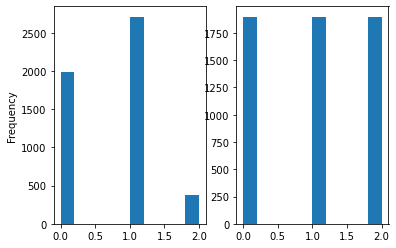

In [6]:
plt.subplot(1,2,1)
data['class'].plot.hist()
# plt.show()
plt.subplot(1,2,2)
plt.hist(y_res)
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       598
           1       0.90      0.81      0.85       814
           2       0.26      0.45      0.33       113

    accuracy                           0.75      1525
   macro avg       0.63      0.66      0.64      1525
weighted avg       0.79      0.75      0.77      1525

Confusion Matrix
 [[440  62  96]
 [104 657  53]
 [ 50  12  51]]

Accuracy raw-full_image 0.7527868852459016

F1-score avg raw-full_image 0.7676038930153063


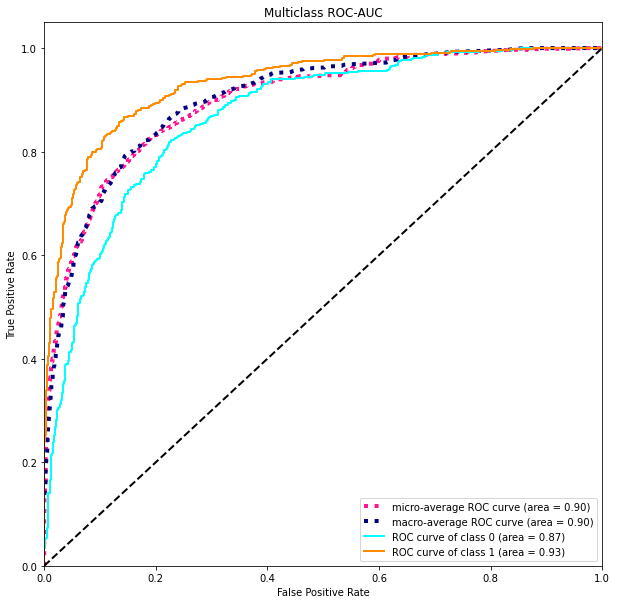

In [9]:
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_res, y_res)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))
print(f'\nAccuracy {feat_type}-{mask_type}', accuracy_score(y_test, y_pred))
print(f'\nF1-score avg {feat_type}-{mask_type}', f1_score(y_test, y_pred, average='weighted'))

enc = OneHotEncoder()
y_test_oh = enc.fit_transform(y_test.reshape(-1,1)).toarray()
roc_auc_score_multiclass(svc, X_test, y_test_oh)

### Sklean Class weights

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       598
           1       0.91      0.78      0.84       814
           2       0.23      0.51      0.32       113

    accuracy                           0.73      1525
   macro avg       0.62      0.67      0.63      1525
weighted avg       0.79      0.73      0.75      1525

Confusion Matrix
 [[425  56 117]
 [105 631  78]
 [ 45  10  58]]

Accuracy raw-full_image 0.7304918032786886

F1-score avg raw-full_image 0.753447368229152


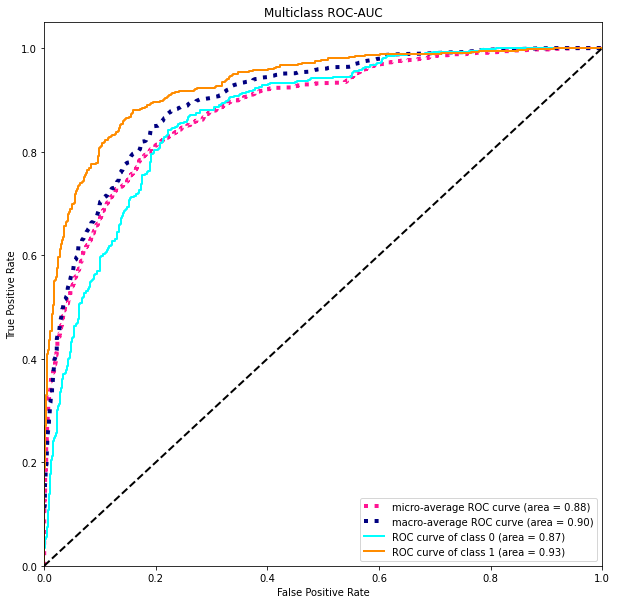

In [12]:
svc = SVC(kernel='rbf', probability=True,  class_weight='balanced')
# svc = RandomForestClassifier(n_estimators=100, class_weight='balanced')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))
print(f'\nAccuracy {feat_type}-{mask_type}', accuracy_score(y_test, y_pred))
print(f'\nF1-score avg {feat_type}-{mask_type}', f1_score(y_test, y_pred, average='weighted'))

enc = OneHotEncoder()
y_test_oh = enc.fit_transform(y_test.reshape(-1,1)).toarray()
roc_auc_score_multiclass(svc, X_test, y_test_oh)

# Finish ensembling with minoruity undesampling and test it
# Look into how to make BoW work
# Fine-tune mean shift for binary   

In [51]:
def resample_minority(X, y, nbatches='auto'):
    """Created bacthes of balanced datasets by resampling the minority class

    Args:
        X (np.ndarray): X data, shape (n_samples, n_features)
        y (np.ndarray): y data, shape (n_samples, )
        nbatches (int|str): Either auto or a number of batches to create.
            If auto, the number of batches is determined by the number of
            samples in the majority class // # of samples in minority class.

    Returns:
        X, y: Lists with the resamples batches of X and y
            where all the classes are balanced (undersampled to minority).
    """
    minority_class, min_samples = min(Counter(y_train).items(), key=lambda x: x[1])
    majority_class, maj_samples = max(Counter(y_train).items(), key=lambda x: x[1])
    
    if nbatches=='auto':
        nbatches = maj_samples//min_samples
        
    X_res = []
    y_res = []
    for n in range(nbatches):
        batch_X = []
        batch_y = []
        for cls in np.unique(y):
            if cls == minority_class:
                batch_X.append(X[y==cls])
                batch_y.append(y[y==cls])
            else:
                cls_X = X[y==cls]
                cls_y = y[y==cls]
                sampling_idxs = np.random.choice(len(cls_y), size=min_samples, replace=False)
                batch_X.append(cls_X[sampling_idxs])
                batch_y.append(cls_y[sampling_idxs])
        X_res.append(np.concatenate(batch_X))
        y_res.append(np.concatenate(batch_y))
    return X_res, y_res

In [52]:
X_res, y_res = resample_minority(X_train, y_train, )
Counter(y_res[0])

Counter({0: 263, 1: 263, 2: 263})

In [53]:
pres = []
pres_lab = []
for b in range(len(X_res)):
    X_batch_train = X_res[b]
    y_batch_train = y_res[b]
    
    svc = SVC(kernel='rbf', probability=True,  class_weight='balanced')
    # svc = RandomForestClassifier(n_estimators=100, class_weight='balanced')
    svc.fit(X_batch_train, y_batch_train)

    pres.append(svc.predict_proba(X_test))
    pres_lab.append(svc.predict(X_test))

In [54]:
mean_voting = np.asarray(pres).mean(axis=0)
nmean_voting = np.argmax(mean_voting, axis=1)

majority_voting = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=np.asarray(pres_lab))


              precision    recall  f1-score   support

           0       0.72      0.62      0.66       598
           1       0.88      0.75      0.81       814
           2       0.20      0.54      0.29       113

    accuracy                           0.69      1525
   macro avg       0.60      0.64      0.59      1525
weighted avg       0.77      0.69      0.72      1525

Confusion Matrix
 [[371  74 153]
 [104 613  97]
 [ 43   9  61]]

Accuracy raw-full_image 0.6852459016393443

F1-score avg raw-full_image 0.7154179962495264


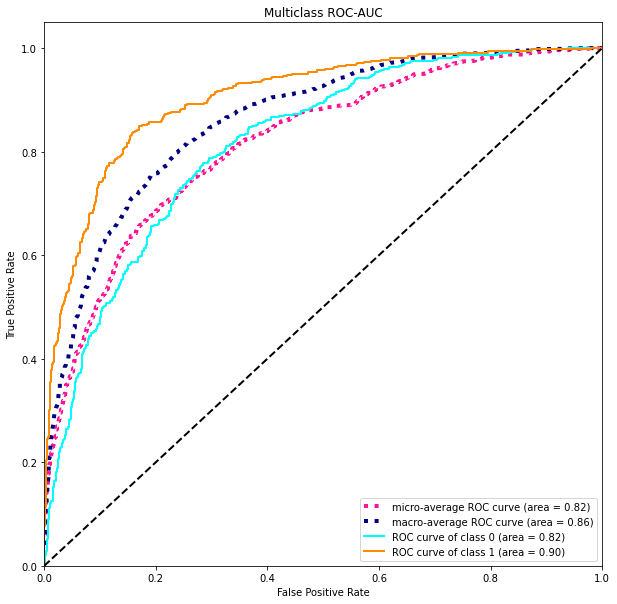

In [55]:

print(classification_report(y_test, nmean_voting))
print('Confusion Matrix\n',confusion_matrix(y_test, nmean_voting))
print(f'\nAccuracy {feat_type}-{mask_type}', accuracy_score(y_test, nmean_voting))
print(f'\nF1-score avg {feat_type}-{mask_type}', f1_score(y_test, nmean_voting, average='weighted'))

enc = OneHotEncoder()
y_test_oh = enc.fit_transform(y_test.reshape(-1,1)).toarray()
roc_auc_score_multiclass(svc, X_test, y_test_oh)

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       598
           1       0.89      0.73      0.80       814
           2       0.19      0.55      0.29       113

    accuracy                           0.68      1525
   macro avg       0.59      0.64      0.58      1525
weighted avg       0.76      0.68      0.71      1525

Confusion Matrix
 [[380  65 153]
 [120 591 103]
 [ 43   8  62]]

Accuracy raw-full_image 0.6773770491803278

F1-score avg raw-full_image 0.7093819073391489


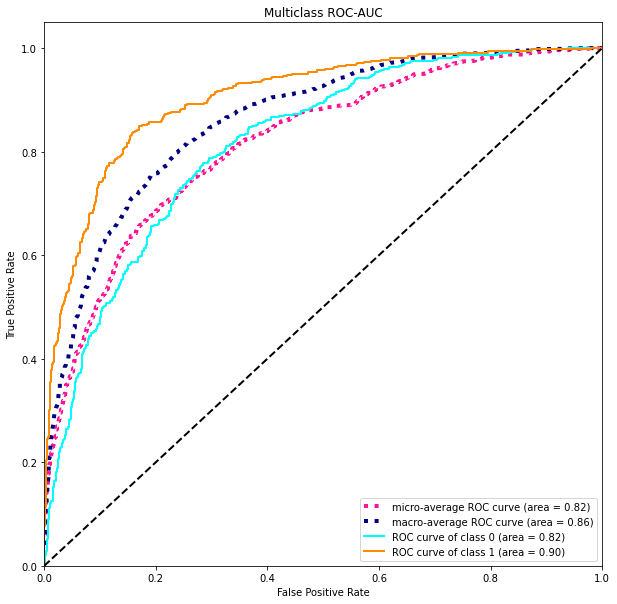

In [56]:

print(classification_report(y_test, majority_voting))
print('Confusion Matrix\n',confusion_matrix(y_test, majority_voting))
print(f'\nAccuracy {feat_type}-{mask_type}', accuracy_score(y_test, majority_voting))
print(f'\nF1-score avg {feat_type}-{mask_type}', f1_score(y_test, majority_voting, average='weighted'))

enc = OneHotEncoder()
y_test_oh = enc.fit_transform(y_test.reshape(-1,1)).toarray()
roc_auc_score_multiclass(svc, X_test, y_test_oh)